In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import sklearn.metrics as skmt
from sklearn.preprocessing import MinMaxScaler

In [146]:
train_data=pd.read_csv("/Users/tungtran/Documents/EC_comp/traindata (1).csv",skipinitialspace=True)
train_data


,rec_num,lfsstat,prov,cma,age_12,sex,marstat,educ,mjh,cowmain,...,paidot,unpaidot,xtrahrs,tenure,hrlyearn,union,permtemp,estsize,firmsize,efamtype
0,1,1,48,8,11,2,1,4,1,2,...,0.0,0.0,0.0,86,24.22,1,1,2,4,18
1,2,1,35,0,8,1,1,2,1,1,...,0.0,0.0,0.0,240,30.05,1,1,2,4,3
2,10,1,24,0,10,1,2,2,1,2,...,0.0,0.0,0.0,240,28.00,1,3,3,3,5
3,11,1,35,0,6,2,1,5,1,2,...,0.0,0.0,0.0,82,30.37,3,1,2,2,3
4,13,1,35,0,10,1,1,4,1,1,...,0.0,0.0,0.0,133,85.13,1,1,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42087,111268,1,48,0,2,2,6,4,1,2,...,0.0,0.0,0.0,16,25.00,3,1,2,4,1
42088,111269,1,10,0,9,1,1,4,1,1,...,0.0,0.0,0.0,38,26.00,1,1,3,4,2
42089,111277,1,35,0,9,2,6,4,1,2,...,0.0,0.0,0.0,240,35.90,3,1,1,4,1
42090,111281,1,24,0,2,1,6,4,2,2,...,0.0,0.0,0.0,77,22.50,3,2,3,3,14


Text(0.5, 0, 'Hourly Earn')

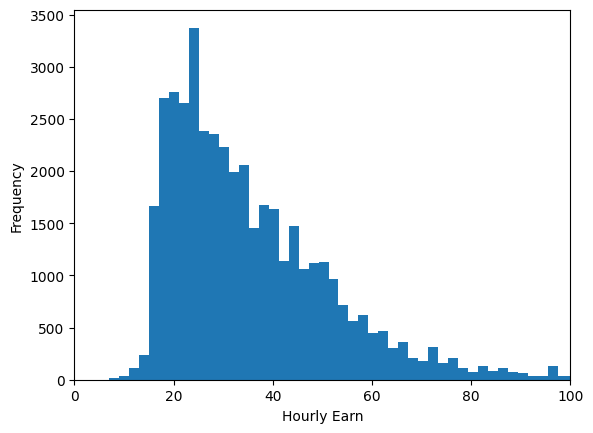

In [147]:
a1 = train_data.hrlyearn.plot(kind='hist',bins=100,xlim=(0,100))
a1.set_xlabel("Hourly Earn")


In [148]:
X = train_data.iloc[:, [col for col in range(train_data.shape[1]) if col != 23]]
y = train_data['hrlyearn']
# x-take columns 2 to 28 (indepedent variables) except for column 23 which is the dependent variable 
#y-The target variable is share (how often an article is shared)

#scaler = MinMaxScaler(feature_range=(0, 1))
scaledX = X #scaler.fit_transform(X)
scaledy= y #/np.max(y)


In [149]:
print("Shape of X:",scaledX.shape)

Shape of X: (42092, 28)


In [150]:
scaledy

0        24.22
1        30.05
2        28.00
3        30.37
4        85.13
         ...  
42087    25.00
42088    26.00
42089    35.90
42090    22.50
42091    20.00
Name: hrlyearn, Length: 42092, dtype: float64

### *Build test and training set* 

In [151]:
X_train, X_test, y_train, y_test = skms.train_test_split(scaledX, scaledy, test_size=0.25, random_state=1)
X_train



,rec_num,lfsstat,prov,cma,age_12,sex,marstat,educ,mjh,cowmain,...,hrsaway,paidot,unpaidot,xtrahrs,tenure,union,permtemp,estsize,firmsize,efamtype
21679,57563,1,24,1,6,1,5,4,1,1,...,0.0,0.0,0.0,0.0,63,1,1,1,1,14
8161,21899,1,47,0,7,2,1,4,1,1,...,0.0,0.0,0.0,0.0,212,1,1,2,4,3
35036,92697,1,24,0,7,1,2,4,1,2,...,0.0,0.0,0.0,0.0,168,3,1,2,4,3
32747,86653,1,35,0,5,2,6,5,1,2,...,0.0,0.0,0.0,0.0,22,3,1,1,1,1
39501,104352,1,24,0,6,1,2,4,1,2,...,2.0,0.0,0.0,0.0,239,3,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,20921,1,47,0,9,1,1,2,1,2,...,0.0,0.0,0.0,0.0,1,3,1,1,1,2
32511,86028,1,46,6,3,2,1,5,1,2,...,0.0,0.0,0.0,0.0,123,3,1,2,4,2
5192,13784,1,59,0,9,2,1,4,1,2,...,0.0,0.0,0.0,0.0,137,1,1,3,4,2
12172,32519,1,12,0,9,1,1,4,1,1,...,0.0,0.0,0.0,0.0,205,1,1,1,4,2


### *Train a regression model* 

This will provide something to measure the neural network against!

In [152]:
model = sklm.LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)


model = sklm.Lasso(alpha=1)
model.fit(X_train,y_train)
print(model.coef_)

[-3.34393604e-06  3.29181127e-14  1.07628418e-01  1.89973554e-01
  3.38344927e-01 -6.79828368e+00 -6.28388720e-01  2.68054096e+00
 -9.05958464e-01 -1.99174619e+00  2.70516725e+00 -2.40551624e-01
  8.67734693e+00 -2.22644100e+00  8.37688487e-02  1.23138912e-02
 -9.84080494e-02  2.92627587e-02  6.97528395e-02 -2.03814692e-01
  4.90137371e-01  2.86322679e-01  2.35862182e-02  7.21749370e-01
 -1.37354489e+00  1.77067200e+00  9.62026738e-01 -4.26817951e-02]
[-3.27178400e-06  0.00000000e+00  1.06100301e-01  0.00000000e+00
  6.47608809e-02 -2.83012750e+00 -4.65141983e-01  2.50257655e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -3.56572691e-01
  0.00000000e+00 -4.16335458e-01  2.11123053e-02  7.11847938e-02
 -1.22829132e-02 -0.00000000e+00  6.57316090e-02  0.00000000e+00
  6.79543318e-01  1.10722102e-01  3.65566759e-02 -0.00000000e+00
 -0.00000000e+00  1.61009262e+00  4.50258277e-01 -9.70450733e-02]


### *Evaluate training and testing error*

In [153]:
def get_eval(real,pred):
        if (real is None or pred is None):
            print("Dataset not available (may need to split and/or train the model)")
            return
        mstats = {}
        mstats["mae"] = skmt.mean_absolute_error(real,pred)
        mstats["mse"] = skmt.mean_squared_error(real,pred)
        mstats["rmse"] = np.sqrt(mstats["mse"])
        return(mstats)

train_err = get_eval(y_train,model.predict(X_train))
test_err = get_eval(y_test,model.predict(X_test))

print("Training error",train_err)
print("Testing error",test_err)

Training error {'mae': 10.571426109148033, 'mse': 229.8358750780443, 'rmse': 15.160338884010617}
Testing error {'mae': 10.461857027888245, 'mse': 218.31792247641835, 'rmse': 14.775585351397025}


In [154]:
pd.DataFrame(zip(X.rec_num, model.predict(X)))

,0,1
0,1,30.302986
1,2,31.698371
2,10,33.599615
3,11,42.930540
4,13,46.506789
...,...,...
42087,111268,23.942734
42088,111269,27.340532
42089,111277,32.723974
42090,111281,25.788219


In [155]:
submission=pd.DataFrame(zip(X.rec_num, model.predict(X)))
submission_file = '/Users/tungtran/Documents/EC_comp/submission.csv'
submission.to_csv(submission_file, index=False)

submission_file

'/Users/tungtran/Documents/EC_comp/submission.csv'

## Part 2:
Using scikitlearn lasso (L1 regularization) and ridge (L2 regularization) experiment with hyperparameters (regularization rate $\alpha$). Optimal $\alpha$ for Lasso regression is 0.1. The ridge regression perform consistently. 

In [156]:
from sklearn.linear_model import Lasso, Ridge
# Define different alpha values to test
alpha_values = [0.001,0.005,0.02, 0.1]

# Store results
results = {}

for alpha in alpha_values:
    print(f"Testing Lasso and Ridge with alpha = {alpha}")

Testing Lasso and Ridge with alpha = 0.001
Testing Lasso and Ridge with alpha = 0.005
Testing Lasso and Ridge with alpha = 0.02
Testing Lasso and Ridge with alpha = 0.1


In [157]:
lasso_model = Lasso(alpha=alpha, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_train_err = get_eval(y_train, lasso_model.predict(X_train))
lasso_test_err = get_eval(y_test, lasso_model.predict(X_test))
print("Training Error:", lasso_train_err)
print("Testing Error:", lasso_test_err)

Training Error: {'mae': 10.07166597534457, 'mse': 212.13540328326968, 'rmse': 14.564868804190091}
Testing Error: {'mae': 9.981297774873758, 'mse': 201.2610201558875, 'rmse': 14.186649363253027}


In [158]:
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
ridge_train_err = get_eval(y_train, ridge_model.predict(X_train))
ridge_test_err = get_eval(y_test, ridge_model.predict(X_test))
    

In [159]:
results[alpha] = {
        "Lasso": {"Train Error": lasso_train_err, "Test Error": lasso_test_err},
        "Ridge": {"Train Error": ridge_train_err, "Test Error": ridge_test_err},
    }

In [160]:
for alpha, res in results.items():
    print(f"\nAlpha = {alpha}")
    print("Lasso Regression:", res["Lasso"])
    print("Ridge Regression:", res["Ridge"])


Alpha = 0.1
Lasso Regression: {'Train Error': {'mae': 10.07166597534457, 'mse': 212.13540328326968, 'rmse': 14.564868804190091}, 'Test Error': {'mae': 9.981297774873758, 'mse': 201.2610201558875, 'rmse': 14.186649363253027}}
Ridge Regression: {'Train Error': {'mae': 10.083426956641691, 'mse': 211.71974373500564, 'rmse': 14.550592556147176}, 'Test Error': {'mae': 9.993496831710234, 'mse': 200.84365428563737, 'rmse': 14.171931917901574}}


In [161]:
best_lasso_model = Lasso(alpha=0.1, max_iter=10000)
best_lasso_model.fit(X_train, y_train)

train_err_lass = get_eval(y_train,model.predict(X_train))
test_err_lass = get_eval(y_test,model.predict(X_test))

# Create a DataFrame directly with named columns
submission_2 = pd.DataFrame({
    'rec_num': train_data['rec_num'],  # Make sure 'rec_num' comes from the original DataFrame
    'phrlyearn': best_lasso_model.predict(X)  # Predict on the full dataset
})

# Save to CSV format
submission_file = '/Users/tungtran/Documents/EC_comp/submission_2.csv'
submission_2.to_csv(submission_file, index=False)

submission_file

'/Users/tungtran/Documents/EC_comp/submission_2.csv'